In [68]:
! pip install seaborn matplotlib plotly numpy scikit-learn

74890.28s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
  Using cached numpy-1.26.4-cp312-cp312-macosx_11_0_arm64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-macosx_11_0_arm64.whl (13.7 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.1.1
    Uninstalling numpy-2.1.1:
      Successfully uninstalled numpy-2.1.1


In [1]:
from cords import getloc
from utils import MScore_to_int

In [2]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from utils import MScore_to_int
import numpy as np
import matplotlib.pyplot as plt

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
companies_df = pd.read_csv('datasets/cleaned-credit-risk.csv')
companies_df

,Company name,Turnover.2020,Turnover.2019,Turnover.2018,Turnover.2017,Turnover.2016,Turnover.2015,EBIT.2020,EBIT.2019,EBIT.2018,EBIT.2017,EBIT.2016,EBIT.2015,PLTax.2020,PLTax.2019,PLTax.2018,PLTax.2017,PLTax.2016,PLTax.2015,MScore.2020,MScore.2019,MScore.2018,MScore.2017,MScore.2016,MScore.2015,Region,Country,NACE code,Sector 1,Sector 2,Leverage.2020,Leverage.2019,Leverage.2018,Leverage.2017,Leverage.2016,Leverage.2015,ROE.2020,ROE.2019,ROE.2018,ROE.2017,ROE.2016,ROE.2015,TAsset.2020,TAsset.2019,TAsset.2018,TAsset.2017,TAsset.2016,TAsset.2015
0,LENDLEASE S.R.L.,29458,16716,9612,8097,7941.0,5600.0,-1556.0,-4540.0,623.0,-412.0,885.0,-1479.0,-1402.0,-4674.0,22.0,-360.0,368.0,-1140.0,CC,CC,CCC,C,BB,C,Milano,Italy,4200,Civil engineering,Capital Goods,14.33,9.90,56.77,64.15,21.46,48.07,-43.63,-180.22,8.24,-146.65,60.76,-471.72,49263,28268,15455,15992,13597.0,11659.0
1,PRICEWATERHOUSECOOPERS BUSINESS SERVICES SRL (...,16731,16403,16843,12241,9252.0,9515.0,1838.0,841.0,2738.0,-864.0,-2212.0,-3572.0,1600.0,700.0,2577.0,-900.0,-2187.0,-4591.0,A,BBB,BBB,CC,CCC,CCC,Milano,Italy,7022,Activities of head offices; management consult...,Commercial and professional services,1.86,2.45,2.92,5.65,2.90,1.29,27.60,14.30,61.42,-55.57,-127.29,-87.13,16550,16887,16468,10773,6697.0,8933.0
2,EVISO S.P.A.,48568,43039,34302,25791,19760.0,6941.0,1661.0,1464.0,976.0,495.0,162.0,224.0,1159.0,1047.0,779.0,267.0,63.0,123.0,BBB,BBB,BBB,BB,BB,BB,Cuneo,Italy,3514,"ELECTRICITY, GAS, STEAM AND AIR CONDITIONING S...",Utilities,3.59,3.49,4.44,7.69,12.54,9.39,39.38,48.89,57.52,42.73,20.34,44.62,13500,9620,7371,5432,4170.0,2862.0
3,CASA SERVICE MACHINE,47999,43484,43043,41682,51267.0,52584.0,416.0,255.0,-855.0,-23.0,426.0,969.0,236.0,107.0,-1002.0,-197.0,430.0,602.0,BB,B,CCC,B,BB,BB,Pas-de-Calais,France,4661,"Wholesale trade, except of motor vehicles and ...",Retailing,3.54,3.89,4.15,2.64,3.21,3.18,8.42,5.69,-17.24,0.71,2.89,6.45,24978,25032,25729,21632,25403.0,24941.0
4,PANFERTIL SPA,45948,47336,45626,48222,57074.0,62263.0,44.0,713.0,-672.0,-1091.0,97.0,987.0,3.0,48.0,-599.0,-821.0,-10.0,-1116.0,B,BB,CCC,CCC,B,B,Ravenna,Italy,4675,"Wholesale trade, except of motor vehicles and ...",Retailing,2.17,1.98,2.13,2.15,2.15,2.11,0.03,0.41,-5.17,-6.74,0.03,-8.19,36823,34659,36205,38423,41847.0,41323.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120883,ASTOR VILLAGE S.R.L.,3161,4635,4742,4499,4277.0,3650.0,985.0,1818.0,1790.0,1248.0,1154.0,800.0,739.0,1185.0,1283.0,875.0,744.0,494.0,AA,AA,AA,AA,A,A,Lecce,Italy,5510,Accommodation,Consumer Services,0.17,0.22,0.24,0.26,0.29,0.34,5.44,9.23,11.01,8.44,7.83,6.31,15935,15664,14438,13054,12243.0,11695.0
120884,ODONE & SLOA S.R.L.,3161,2562,2559,2334,3692.0,2537.0,60.0,101.0,27.0,10.0,9.0,74.0,21.0,6.0,1.0,-4.0,-7.0,21.0,B,CCC,CCC,CCC,CCC,CCC,Latina,Italy,2825,Manufacture of machinery and equipment n.e.c.,Capital Goods,20.56,23.61,25.57,27.67,29.35,20.71,18.38,6.00,0.62,-4.80,-7.85,-12.84,2487,2317,2351,2521,2797.0,3152.0
120885,GARRIDO MURO SOCIEDAD LIMITADA,3161,3146,2989,3101,2746.0,3154.0,260.0,13.0,48.0,41.0,49.0,94.0,191.0,19.0,25.0,41.0,37.0,72.0,A,A,A,BBB,BBB,A,La Rioja,Spain,1520,Manufacture of leather and related products,Consumer Durables and Apparel,0.45,0.17,0.28,0.40,0.37,0.33,10.86,1.23,1.88,3.10,2.90,5.62,2547,1855,1692,1843,1773.0,1699.0
120886,CENTRO INGROSSO JOLLY S.R.L.,3161,2519,2290,2244,1761.0,1821.0,74.0,48.0,60.0,42.0,39.0,8.0,54.0,23.0,23.0,21.0,20.0,1.0,BB,BB,B,B,B,CCC,Salerno,Italy,4649,"Wholesale trade, except of motor vehicles and ...",Retailing,3.29,3.01,3.25,3.19,13.49,13.12,7.78,3.65,3.74,3.54,18.85,0.58,2961,2552,2604,2474,1546.0,1222.0


In [ ]:
# for index, row in nan_rows.iterrows():
#     if row['latitude'].isna() | row['Longitude'].isna():
#         query = row['City']+','+row['Country']
#         response = getloc(query)
#         comp_loc.at[index,'Latitude'] , comp_loc.at[index,'Longitude'] = response['lat'] , response['lon']

In [5]:
dupli = companies_df.duplicated()
print([x for x in dupli if x==True])

[]


In [6]:
companies_df = companies_df.rename(columns={'Region':'City'})
companies_df['City'] = companies_df['City'].str.lower()
companies_df

,Company name,Turnover.2020,Turnover.2019,Turnover.2018,Turnover.2017,Turnover.2016,Turnover.2015,EBIT.2020,EBIT.2019,EBIT.2018,EBIT.2017,EBIT.2016,EBIT.2015,PLTax.2020,PLTax.2019,PLTax.2018,PLTax.2017,PLTax.2016,PLTax.2015,MScore.2020,MScore.2019,MScore.2018,MScore.2017,MScore.2016,MScore.2015,City,Country,NACE code,Sector 1,Sector 2,Leverage.2020,Leverage.2019,Leverage.2018,Leverage.2017,Leverage.2016,Leverage.2015,ROE.2020,ROE.2019,ROE.2018,ROE.2017,ROE.2016,ROE.2015,TAsset.2020,TAsset.2019,TAsset.2018,TAsset.2017,TAsset.2016,TAsset.2015
0,LENDLEASE S.R.L.,29458,16716,9612,8097,7941.0,5600.0,-1556.0,-4540.0,623.0,-412.0,885.0,-1479.0,-1402.0,-4674.0,22.0,-360.0,368.0,-1140.0,CC,CC,CCC,C,BB,C,milano,Italy,4200,Civil engineering,Capital Goods,14.33,9.90,56.77,64.15,21.46,48.07,-43.63,-180.22,8.24,-146.65,60.76,-471.72,49263,28268,15455,15992,13597.0,11659.0
1,PRICEWATERHOUSECOOPERS BUSINESS SERVICES SRL (...,16731,16403,16843,12241,9252.0,9515.0,1838.0,841.0,2738.0,-864.0,-2212.0,-3572.0,1600.0,700.0,2577.0,-900.0,-2187.0,-4591.0,A,BBB,BBB,CC,CCC,CCC,milano,Italy,7022,Activities of head offices; management consult...,Commercial and professional services,1.86,2.45,2.92,5.65,2.90,1.29,27.60,14.30,61.42,-55.57,-127.29,-87.13,16550,16887,16468,10773,6697.0,8933.0
2,EVISO S.P.A.,48568,43039,34302,25791,19760.0,6941.0,1661.0,1464.0,976.0,495.0,162.0,224.0,1159.0,1047.0,779.0,267.0,63.0,123.0,BBB,BBB,BBB,BB,BB,BB,cuneo,Italy,3514,"ELECTRICITY, GAS, STEAM AND AIR CONDITIONING S...",Utilities,3.59,3.49,4.44,7.69,12.54,9.39,39.38,48.89,57.52,42.73,20.34,44.62,13500,9620,7371,5432,4170.0,2862.0
3,CASA SERVICE MACHINE,47999,43484,43043,41682,51267.0,52584.0,416.0,255.0,-855.0,-23.0,426.0,969.0,236.0,107.0,-1002.0,-197.0,430.0,602.0,BB,B,CCC,B,BB,BB,pas-de-calais,France,4661,"Wholesale trade, except of motor vehicles and ...",Retailing,3.54,3.89,4.15,2.64,3.21,3.18,8.42,5.69,-17.24,0.71,2.89,6.45,24978,25032,25729,21632,25403.0,24941.0
4,PANFERTIL SPA,45948,47336,45626,48222,57074.0,62263.0,44.0,713.0,-672.0,-1091.0,97.0,987.0,3.0,48.0,-599.0,-821.0,-10.0,-1116.0,B,BB,CCC,CCC,B,B,ravenna,Italy,4675,"Wholesale trade, except of motor vehicles and ...",Retailing,2.17,1.98,2.13,2.15,2.15,2.11,0.03,0.41,-5.17,-6.74,0.03,-8.19,36823,34659,36205,38423,41847.0,41323.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120883,ASTOR VILLAGE S.R.L.,3161,4635,4742,4499,4277.0,3650.0,985.0,1818.0,1790.0,1248.0,1154.0,800.0,739.0,1185.0,1283.0,875.0,744.0,494.0,AA,AA,AA,AA,A,A,lecce,Italy,5510,Accommodation,Consumer Services,0.17,0.22,0.24,0.26,0.29,0.34,5.44,9.23,11.01,8.44,7.83,6.31,15935,15664,14438,13054,12243.0,11695.0
120884,ODONE & SLOA S.R.L.,3161,2562,2559,2334,3692.0,2537.0,60.0,101.0,27.0,10.0,9.0,74.0,21.0,6.0,1.0,-4.0,-7.0,21.0,B,CCC,CCC,CCC,CCC,CCC,latina,Italy,2825,Manufacture of machinery and equipment n.e.c.,Capital Goods,20.56,23.61,25.57,27.67,29.35,20.71,18.38,6.00,0.62,-4.80,-7.85,-12.84,2487,2317,2351,2521,2797.0,3152.0
120885,GARRIDO MURO SOCIEDAD LIMITADA,3161,3146,2989,3101,2746.0,3154.0,260.0,13.0,48.0,41.0,49.0,94.0,191.0,19.0,25.0,41.0,37.0,72.0,A,A,A,BBB,BBB,A,la rioja,Spain,1520,Manufacture of leather and related products,Consumer Durables and Apparel,0.45,0.17,0.28,0.40,0.37,0.33,10.86,1.23,1.88,3.10,2.90,5.62,2547,1855,1692,1843,1773.0,1699.0
120886,CENTRO INGROSSO JOLLY S.R.L.,3161,2519,2290,2244,1761.0,1821.0,74.0,48.0,60.0,42.0,39.0,8.0,54.0,23.0,23.0,21.0,20.0,1.0,BB,BB,B,B,B,CCC,salerno,Italy,4649,"Wholesale trade, except of motor vehicles and ...",Retailing,3.29,3.01,3.25,3.19,13.49,13.12,7.78,3.65,3.74,3.54,18.85,0.58,2961,2552,2604,2474,1546.0,1222.0


In [8]:
countries = pd.read_csv('datasets/countries.tar.gz',compression='gzip')[['name','alpha-2']]
countries

,name,alpha-2
0,Afghanistan,AF
1,Åland Islands,AX
2,Albania,AL
3,Algeria,DZ
4,American Samoa,AS
...,...,...
244,Wallis and Futuna,WF
245,Western Sahara,EH
246,Yemen,YE
247,Zambia,ZM


In [9]:
countries['alpha-2'] = countries['alpha-2'].str.lower()
countries = countries.rename(columns={'name':'Country'})

countries

,Country,alpha-2
0,Afghanistan,af
1,Åland Islands,ax
2,Albania,al
3,Algeria,dz
4,American Samoa,as
...,...,...
244,Wallis and Futuna,wf
245,Western Sahara,eh
246,Yemen,ye
247,Zambia,zm


In [10]:
countries[countries.isna().any(axis=1)]

,Country,alpha-2
153,Namibia,NaN


In [11]:
countries = countries.dropna()
countries

,Country,alpha-2
0,Afghanistan,af
1,Åland Islands,ax
2,Albania,al
3,Algeria,dz
4,American Samoa,as
...,...,...
244,Wallis and Futuna,wf
245,Western Sahara,eh
246,Yemen,ye
247,Zambia,zm


In [12]:
cities = pd.read_csv('datasets/world-cities.tar.gz',compression='gzip',low_memory=False)[['City','Country','Latitude','Longitude']]
cities

,City,Country,Latitude,Longitude
0,aixas,ad,42.483333,1.466667
1,aixirivali,ad,42.466667,1.500000
2,aixirivall,ad,42.466667,1.500000
3,aixirvall,ad,42.466667,1.500000
4,aixovall,ad,42.466667,1.483333
...,...,...,...,...
3173953,zimre park,zw,-17.866111,31.213611
3173954,ziyakamanas,zw,-18.216667,27.950000
3173955,zizalisari,zw,-17.758889,31.010556
3173956,zuzumba,zw,-20.033333,27.933333


In [13]:
cities.isna().sum()

City         6
Country      0
Latitude     0
Longitude    0
dtype: int64

In [14]:
cities[cities.isna().any(axis=1)]

,City,Country,Latitude,Longitude
98581,NaN,al,42.011667,20.416389
545196,NaN,cn,29.359551,112.402433
959881,NaN,fr,47.374053,4.358566
1348414,NaN,in,32.994444,74.347222
2133528,NaN,ph,13.912500,122.172600
2753400,NaN,th,18.792917,100.729722


In [15]:
cities = cities.dropna()
cities

,City,Country,Latitude,Longitude
0,aixas,ad,42.483333,1.466667
1,aixirivali,ad,42.466667,1.500000
2,aixirivall,ad,42.466667,1.500000
3,aixirvall,ad,42.466667,1.500000
4,aixovall,ad,42.466667,1.483333
...,...,...,...,...
3173953,zimre park,zw,-17.866111,31.213611
3173954,ziyakamanas,zw,-18.216667,27.950000
3173955,zizalisari,zw,-17.758889,31.010556
3173956,zuzumba,zw,-20.033333,27.933333


In [16]:
cities = cities.rename(columns={'Country':'alpha-2'})
cities = cities.drop_duplicates(subset=['Latitude', 'Longitude'])
cities = cities.drop_duplicates(subset=['City', 'alpha-2'])
cities

,City,alpha-2,Latitude,Longitude
0,aixas,ad,42.483333,1.466667
1,aixirivali,ad,42.466667,1.500000
4,aixovall,ad,42.466667,1.483333
5,andorra,ad,42.500000,1.516667
11,ansalonga,ad,42.566667,1.516667
...,...,...,...,...
3173951,zikamanas village,zw,-18.216667,27.950000
3173952,zimbabwe,zw,-20.266667,30.916667
3173953,zimre park,zw,-17.866111,31.213611
3173955,zizalisari,zw,-17.758889,31.010556


In [17]:
comp_loc = companies_df[['Company name','City', 'Country']].merge(countries, on='Country')
comp_loc

,Company name,City,Country,alpha-2
0,LENDLEASE S.R.L.,milano,Italy,it
1,PRICEWATERHOUSECOOPERS BUSINESS SERVICES SRL (...,milano,Italy,it
2,EVISO S.P.A.,cuneo,Italy,it
3,CASA SERVICE MACHINE,pas-de-calais,France,fr
4,PANFERTIL SPA,ravenna,Italy,it
...,...,...,...,...
120883,ASTOR VILLAGE S.R.L.,lecce,Italy,it
120884,ODONE & SLOA S.R.L.,latina,Italy,it
120885,GARRIDO MURO SOCIEDAD LIMITADA,la rioja,Spain,es
120886,CENTRO INGROSSO JOLLY S.R.L.,salerno,Italy,it


In [18]:
comp_loc = comp_loc.merge(cities, on=['City','alpha-2'], how='left')
comp_loc

,Company name,City,Country,alpha-2,Latitude,Longitude
0,LENDLEASE S.R.L.,milano,Italy,it,42.783333,12.600000
1,PRICEWATERHOUSECOOPERS BUSINESS SERVICES SRL (...,milano,Italy,it,42.783333,12.600000
2,EVISO S.P.A.,cuneo,Italy,it,NaN,NaN
3,CASA SERVICE MACHINE,pas-de-calais,France,fr,NaN,NaN
4,PANFERTIL SPA,ravenna,Italy,it,44.417500,12.201111
...,...,...,...,...,...,...
120883,ASTOR VILLAGE S.R.L.,lecce,Italy,it,40.383333,18.183333
120884,ODONE & SLOA S.R.L.,latina,Italy,it,41.283333,14.266667
120885,GARRIDO MURO SOCIEDAD LIMITADA,la rioja,Spain,es,NaN,NaN
120886,CENTRO INGROSSO JOLLY S.R.L.,salerno,Italy,it,40.683333,14.783333


In [19]:
comp_loc.isna().sum()

Company name        0
City                0
Country             0
alpha-2             0
Latitude        48592
Longitude       48592
dtype: int64

In [26]:
nan_rows = comp_loc[comp_loc['Latitude'].isna() | comp_loc['Longitude'].isna()]
nan_rows

,Company name,City,Country,alpha-2,Latitude,Longitude
2,EVISO S.P.A.,cuneo,Italy,it,NaN,NaN
3,CASA SERVICE MACHINE,pas-de-calais,France,fr,NaN,NaN
5,SFEIR,hauts-de-seine,France,fr,NaN,NaN
6,SODIRE,rhone,France,fr,NaN,NaN
9,JINGOLD S.P.A.,forli-cesena,Italy,it,NaN,NaN
...,...,...,...,...,...,...
120864,ZARAMELLA ARGENTI S.R.L.,padova,Italy,it,NaN,NaN
120873,IMPRIMERIE DEVEVEY,cote-d'or,France,fr,NaN,NaN
120878,NECY,essonne,France,fr,NaN,NaN
120881,SAS JOEL PRUVOST SOCIETE D'EXPERTISE COMPTABLE...,nord,France,fr,NaN,NaN


Due to request limit for the geoloc module of 1 request per second, filling approx 50,000 NaN values takes 14 hrs. Hence it's not practical to run the below cell.

In [ ]:
# for index, row in nan_rows.iterrows():
#     if row['latitude'].isna() | row['Longitude'].isna():
#         query = row['City']+','+row['Country']
#         response = getloc(query)
#         comp_loc.at[index,'Latitude'] , comp_loc.at[index,'Longitude'] = response['lat'] , response['lon']

One hot encoding

In [7]:
encoder = OneHotEncoder(sparse_output=False,dtype=np.int32)

In [8]:
encoder_df = pd.DataFrame(encoder.fit_transform(companies_df[['Country','Sector 2']]))
encoder_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24
0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120883,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
120884,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
120885,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
120886,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [9]:
encoder_df.columns = [ i.replace('Country_','').replace('Sector 2_','') for i in encoder.get_feature_names_out().tolist()]
encoder_df

,France,Germany,Italy,Spain,Automobiles and Components,Capital Goods,Commercial and professional services,Consumer Durables and Apparel,Consumer Services,Diversified Financials,Energy,Food Beverage and Tobacco,Food and Staples Retailing,Health Care Equipment and Services,Household and Personal Products,Materials,Media & Entertainment,Pharmaceuticalcs biotechnology and life sci,Real Estate,Retailing,Software and Services,Technology Hardware and Equipment,Telecommunication Services,Transportation,Utilities
0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120883,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
120884,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
120885,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
120886,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [10]:
new_df = pd.concat([companies_df, encoder_df.apply(pd.to_numeric, downcast='integer')] , axis=1)
new_df = new_df.drop(['City','Country','Sector 1','Sector 2'], axis=1)
new_df

,Company name,Turnover.2020,Turnover.2019,Turnover.2018,Turnover.2017,Turnover.2016,Turnover.2015,EBIT.2020,EBIT.2019,EBIT.2018,EBIT.2017,EBIT.2016,EBIT.2015,PLTax.2020,PLTax.2019,PLTax.2018,PLTax.2017,PLTax.2016,PLTax.2015,MScore.2020,MScore.2019,MScore.2018,MScore.2017,MScore.2016,MScore.2015,NACE code,Leverage.2020,Leverage.2019,Leverage.2018,Leverage.2017,Leverage.2016,Leverage.2015,ROE.2020,ROE.2019,ROE.2018,ROE.2017,ROE.2016,ROE.2015,TAsset.2020,TAsset.2019,TAsset.2018,TAsset.2017,TAsset.2016,TAsset.2015,France,Germany,Italy,Spain,Automobiles and Components,Capital Goods,Commercial and professional services,Consumer Durables and Apparel,Consumer Services,Diversified Financials,Energy,Food Beverage and Tobacco,Food and Staples Retailing,Health Care Equipment and Services,Household and Personal Products,Materials,Media & Entertainment,Pharmaceuticalcs biotechnology and life sci,Real Estate,Retailing,Software and Services,Technology Hardware and Equipment,Telecommunication Services,Transportation,Utilities
0,LENDLEASE S.R.L.,29458,16716,9612,8097,7941.0,5600.0,-1556.0,-4540.0,623.0,-412.0,885.0,-1479.0,-1402.0,-4674.0,22.0,-360.0,368.0,-1140.0,CC,CC,CCC,C,BB,C,4200,14.33,9.90,56.77,64.15,21.46,48.07,-43.63,-180.22,8.24,-146.65,60.76,-471.72,49263,28268,15455,15992,13597.0,11659.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,PRICEWATERHOUSECOOPERS BUSINESS SERVICES SRL (...,16731,16403,16843,12241,9252.0,9515.0,1838.0,841.0,2738.0,-864.0,-2212.0,-3572.0,1600.0,700.0,2577.0,-900.0,-2187.0,-4591.0,A,BBB,BBB,CC,CCC,CCC,7022,1.86,2.45,2.92,5.65,2.90,1.29,27.60,14.30,61.42,-55.57,-127.29,-87.13,16550,16887,16468,10773,6697.0,8933.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,EVISO S.P.A.,48568,43039,34302,25791,19760.0,6941.0,1661.0,1464.0,976.0,495.0,162.0,224.0,1159.0,1047.0,779.0,267.0,63.0,123.0,BBB,BBB,BBB,BB,BB,BB,3514,3.59,3.49,4.44,7.69,12.54,9.39,39.38,48.89,57.52,42.73,20.34,44.62,13500,9620,7371,5432,4170.0,2862.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,CASA SERVICE MACHINE,47999,43484,43043,41682,51267.0,52584.0,416.0,255.0,-855.0,-23.0,426.0,969.0,236.0,107.0,-1002.0,-197.0,430.0,602.0,BB,B,CCC,B,BB,BB,4661,3.54,3.89,4.15,2.64,3.21,3.18,8.42,5.69,-17.24,0.71,2.89,6.45,24978,25032,25729,21632,25403.0,24941.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,PANFERTIL SPA,45948,47336,45626,48222,57074.0,62263.0,44.0,713.0,-672.0,-1091.0,97.0,987.0,3.0,48.0,-599.0,-821.0,-10.0,-1116.0,B,BB,CCC,CCC,B,B,4675,2.17,1.98,2.13,2.15,2.15,2.11,0.03,0.41,-5.17,-6.74,0.03,-8.19,36823,34659,36205,38423,41847.0,41323.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120883,ASTOR VILLAGE S.R.L.,3161,4635,4742,4499,4277.0,3650.0,985.0,1818.0,1790.0,1248.0,1154.0,800.0,739.0,1185.0,1283.0,875.0,744.0,494.0,AA,AA,AA,AA,A,A,5510,0.17,0.22,0.24,0.26,0.29,0.34,5.44,9.23,11.01,8.44,7.83,6.31,15935,15664,14438,13054,12243.0,11695.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
120884,ODONE & SLOA S.R.L.,3161,2562,2559,2334,3692.0,2537.0,60.0,101.0,27.0,10.0,9.0,74.0,21.0,6.0,1.0,-4.0,-7.0,21.0,B,CCC,CCC,CCC,CCC,CCC,2825,20.56,23.61,25.57,27.67,29.35,20.71,18.38,6.00,0.62,-4.80,-7.85,-12.84,2487,2317,2351,2521,2797.0,3152.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
120885,GARRIDO MURO SOCIEDAD LIMITADA,3161,3146,2989,3101,2746.0,3154.0,260.0,13.0,48.0,41.0,49.0,94.0,191.0,19.0,25.0,41.0,37.0,72.0,A,A,A,BBB,BBB,A,1520,0.45,0.17,0.28,0.40,0.37,0.33,10.86,1.23,1.88,3.10,2.90,5.62,2547,1855,1692,1843,1773.0,1699.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
120886,CENTRO INGROSSO JOLLY S.R.L.,3161,2519,2290,2244,1761.0,1821.0,74.0,48.0,60.0,42.0,39.0,8.0,54.0,23.0,23.0,21.0,20.0,1.0,BB,BB,B,B,B,CCC,4649,3.29,3.01,3.25,3.19

In [11]:
for col in (c for c in new_df.columns if c.startswith('MScore.')):
    new_df[col] = new_df[col].apply(MScore_to_int)
new_df

,Company name,Turnover.2020,Turnover.2019,Turnover.2018,Turnover.2017,Turnover.2016,Turnover.2015,EBIT.2020,EBIT.2019,EBIT.2018,EBIT.2017,EBIT.2016,EBIT.2015,PLTax.2020,PLTax.2019,PLTax.2018,PLTax.2017,PLTax.2016,PLTax.2015,MScore.2020,MScore.2019,MScore.2018,MScore.2017,MScore.2016,MScore.2015,NACE code,Leverage.2020,Leverage.2019,Leverage.2018,Leverage.2017,Leverage.2016,Leverage.2015,ROE.2020,ROE.2019,ROE.2018,ROE.2017,ROE.2016,ROE.2015,TAsset.2020,TAsset.2019,TAsset.2018,TAsset.2017,TAsset.2016,TAsset.2015,France,Germany,Italy,Spain,Automobiles and Components,Capital Goods,Commercial and professional services,Consumer Durables and Apparel,Consumer Services,Diversified Financials,Energy,Food Beverage and Tobacco,Food and Staples Retailing,Health Care Equipment and Services,Household and Personal Products,Materials,Media & Entertainment,Pharmaceuticalcs biotechnology and life sci,Real Estate,Retailing,Software and Services,Technology Hardware and Equipment,Telecommunication Services,Transportation,Utilities
0,LENDLEASE S.R.L.,29458,16716,9612,8097,7941.0,5600.0,-1556.0,-4540.0,623.0,-412.0,885.0,-1479.0,-1402.0,-4674.0,22.0,-360.0,368.0,-1140.0,1,1,1,1,0,1,4200,14.33,9.90,56.77,64.15,21.46,48.07,-43.63,-180.22,8.24,-146.65,60.76,-471.72,49263,28268,15455,15992,13597.0,11659.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,PRICEWATERHOUSECOOPERS BUSINESS SERVICES SRL (...,16731,16403,16843,12241,9252.0,9515.0,1838.0,841.0,2738.0,-864.0,-2212.0,-3572.0,1600.0,700.0,2577.0,-900.0,-2187.0,-4591.0,0,0,0,1,1,1,7022,1.86,2.45,2.92,5.65,2.90,1.29,27.60,14.30,61.42,-55.57,-127.29,-87.13,16550,16887,16468,10773,6697.0,8933.0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,EVISO S.P.A.,48568,43039,34302,25791,19760.0,6941.0,1661.0,1464.0,976.0,495.0,162.0,224.0,1159.0,1047.0,779.0,267.0,63.0,123.0,0,0,0,0,0,0,3514,3.59,3.49,4.44,7.69,12.54,9.39,39.38,48.89,57.52,42.73,20.34,44.62,13500,9620,7371,5432,4170.0,2862.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,CASA SERVICE MACHINE,47999,43484,43043,41682,51267.0,52584.0,416.0,255.0,-855.0,-23.0,426.0,969.0,236.0,107.0,-1002.0,-197.0,430.0,602.0,0,0,1,0,0,0,4661,3.54,3.89,4.15,2.64,3.21,3.18,8.42,5.69,-17.24,0.71,2.89,6.45,24978,25032,25729,21632,25403.0,24941.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,PANFERTIL SPA,45948,47336,45626,48222,57074.0,62263.0,44.0,713.0,-672.0,-1091.0,97.0,987.0,3.0,48.0,-599.0,-821.0,-10.0,-1116.0,0,0,1,1,0,0,4675,2.17,1.98,2.13,2.15,2.15,2.11,0.03,0.41,-5.17,-6.74,0.03,-8.19,36823,34659,36205,38423,41847.0,41323.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120883,ASTOR VILLAGE S.R.L.,3161,4635,4742,4499,4277.0,3650.0,985.0,1818.0,1790.0,1248.0,1154.0,800.0,739.0,1185.0,1283.0,875.0,744.0,494.0,0,0,0,0,0,0,5510,0.17,0.22,0.24,0.26,0.29,0.34,5.44,9.23,11.01,8.44,7.83,6.31,15935,15664,14438,13054,12243.0,11695.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
120884,ODONE & SLOA S.R.L.,3161,2562,2559,2334,3692.0,2537.0,60.0,101.0,27.0,10.0,9.0,74.0,21.0,6.0,1.0,-4.0,-7.0,21.0,0,1,1,1,1,1,2825,20.56,23.61,25.57,27.67,29.35,20.71,18.38,6.00,0.62,-4.80,-7.85,-12.84,2487,2317,2351,2521,2797.0,3152.0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
120885,GARRIDO MURO SOCIEDAD LIMITADA,3161,3146,2989,3101,2746.0,3154.0,260.0,13.0,48.0,41.0,49.0,94.0,191.0,19.0,25.0,41.0,37.0,72.0,0,0,0,0,0,0,1520,0.45,0.17,0.28,0.40,0.37,0.33,10.86,1.23,1.88,3.10,2.90,5.62,2547,1855,1692,1843,1773.0,1699.0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
120886,CENTRO INGROSSO JOLLY S.R.L.,3161,2519,2290,2244,1761.0,1821.0,74.0,48.0,60.0,42.0,39.0,8.0,54.0,23.0,23.0,21.0,20.0,1.0,0,0,0,0,0,1,4649,3.29,3.01,3.25,3.19,13.49,13.12,7.78,3.65,3.74,3.54,18.85,0.58,2961,2552,2

In [12]:
com_cor = new_df.iloc[:,1:].corr()
com_cor

,Turnover.2020,Turnover.2019,Turnover.2018,Turnover.2017,Turnover.2016,Turnover.2015,EBIT.2020,EBIT.2019,EBIT.2018,EBIT.2017,EBIT.2016,EBIT.2015,PLTax.2020,PLTax.2019,PLTax.2018,PLTax.2017,PLTax.2016,PLTax.2015,MScore.2020,MScore.2019,MScore.2018,MScore.2017,MScore.2016,MScore.2015,NACE code,Leverage.2020,Leverage.2019,Leverage.2018,Leverage.2017,Leverage.2016,Leverage.2015,ROE.2020,ROE.2019,ROE.2018,ROE.2017,ROE.2016,ROE.2015,TAsset.2020,TAsset.2019,TAsset.2018,TAsset.2017,TAsset.2016,TAsset.2015,France,Germany,Italy,Spain,Automobiles and Components,Capital Goods,Commercial and professional services,Consumer Durables and Apparel,Consumer Services,Diversified Financials,Energy,Food Beverage and Tobacco,Food and Staples Retailing,Health Care Equipment and Services,Household and Personal Products,Materials,Media & Entertainment,Pharmaceuticalcs biotechnology and life sci,Real Estate,Retailing,Software and Services,Technology Hardware and Equipment,Telecommunication Services,Transportation,Utilities
Turnover.2020,1.000000,0.937002,0.905034,0.875734,0.823977,0.706245,0.239196,0.247389,0.210953,0.208203,0.202299,0.204769,0.169009,0.179995,0.150404,0.146398,0.134666,0.074980,-0.025941,0.007147,0.008433,0.009809,0.000840,-0.004151,-0.023022,-0.000601,-0.000596,-0.001572,-0.000245,-0.000882,-0.000399,0.003370,0.000211,-0.001602,0.000076,0.003586,-0.000222,0.316275,0.308761,0.297252,0.286092,0.270267,0.258916,0.105181,0.137093,-0.089220,-0.042890,0.018261,-0.028437,-0.008233,-0.026868,-0.056084,0.014186,0.003752,0.034589,-0.018477,0.004352,-0.007509,-0.007165,-0.005422,0.035676,0.008046,0.036082,0.003874,0.007498,0.005097,-0.006544,0.026572
Turnover.2019,0.937002,1.000000,0.965863,0.934464,0.879131,0.756261,0.152424,0.263952,0.220829,0.219282,0.211480,0.212511,0.092835,0.189766,0.154486,0.151105,0.137950,0.071386,0.041431,0.013073,0.016491,0.015010,0.005200,0.000637,-0.020811,-0.000491,-0.000468,-0.003232,-0.001500,-0.000653,-0.000385,0.001118,-0.000587,-0.003247,-0.000673,0.003099,-0.000752,0.322008,0.326529,0.318586,0.307016,0.291213,0.280328,0.103232,0.128098,-0.088575,-0.039143,0.021176,-0.030080,-0.012496,-0.009533,-0.000335,0.007231,0.006431,0.015842,-0.028598,-0.012623,-0.006262,-0.001390,-0.001826,0.025833,0.004896,0.035100,-0.007978,0.007317,-0.000246,-0.005732,0.022239
Turnover.2018,0.905034,0.965863,1.000000,0.965349,0.908632,0.784088,0.138297,0.235275,0.234044,0.226146,0.215850,0.216259,0.081364,0.164779,0.164587,0.155450,0.140269,0.074433,0.052745,0.030724,0.015128,0.016329,0.006572,0.000833,-0.033263,-0.000941,-0.000863,-0.001970,-0.000582,-0.000979,-0.000750,0.001545,-0.003402,-0.002869,-0.000944,0.002907,-0.000460,0.317423,0.323865,0.323956,0.315593,0.300438,0.290322,0.097969,0.131595,-0.079685,-0.045157,0.029455,-0.037492,-0.018075,-0.003499,-0.005151,0.005291,0.006162,0.017248,-0.028418,-0.012933,-0.006676,0.008565,-0.000681,0.023282,0.004020,0.037073,-0.014981,0.007677,-0.000664,-0.007790,0.022965
Turnover.2017,0.875734,0.934464,0.965349,1.000000,0.943114,0.815415,0.124894,0.214960,0.208764,0.244866,0.224629,0.227664,0.070451,0.146378,0.142489,0.169709,0.144718,0.077481,0.061150,0.041747,0.032004,0.014704,0.007172,-0.000051,-0.038103,-0.001001,-0.000907,-0.001977,0.000717,-0.001074,-0.000771,0.001699,-0.004134,-0.002911,-0.000908,-0.000564,-0.000299,0.317023,0.325166,0.327315,0.327390,0.315615,0.305550,0.100482,0.138718,-0.079950,-0.049486,0.032065,-0.043763,-0.022378,0.000347,-0.005463,0.002537,0.005895,0.025925,-0.026923,-0.010461,-0.006033,0.006973,0.001882,0.022013,0.007580,0.036903,-0.019197,0.008899,-0.002579,-0.009319,0.026194
Turnover.2016,0.823977,0.879131,0.908632,0.943114,1.000000,0.870854,0.108670,0.190380,0.177545,0.218481,0.281297,0.232816,0.056406,0.123706,0.112746,0.146054,0.199179,0.075444,0.066008,0.050486,0.044835,0.029460,0.003152,0.000976,-0.034452,-0.001197,-0.001081,-0.000727,0.002981,-0.001044,-0.001001,0.001592,-0.005329,-0.002541,-0.000787,0.000480,0.000118,0.324962,0.337747,0.343746,0.34630

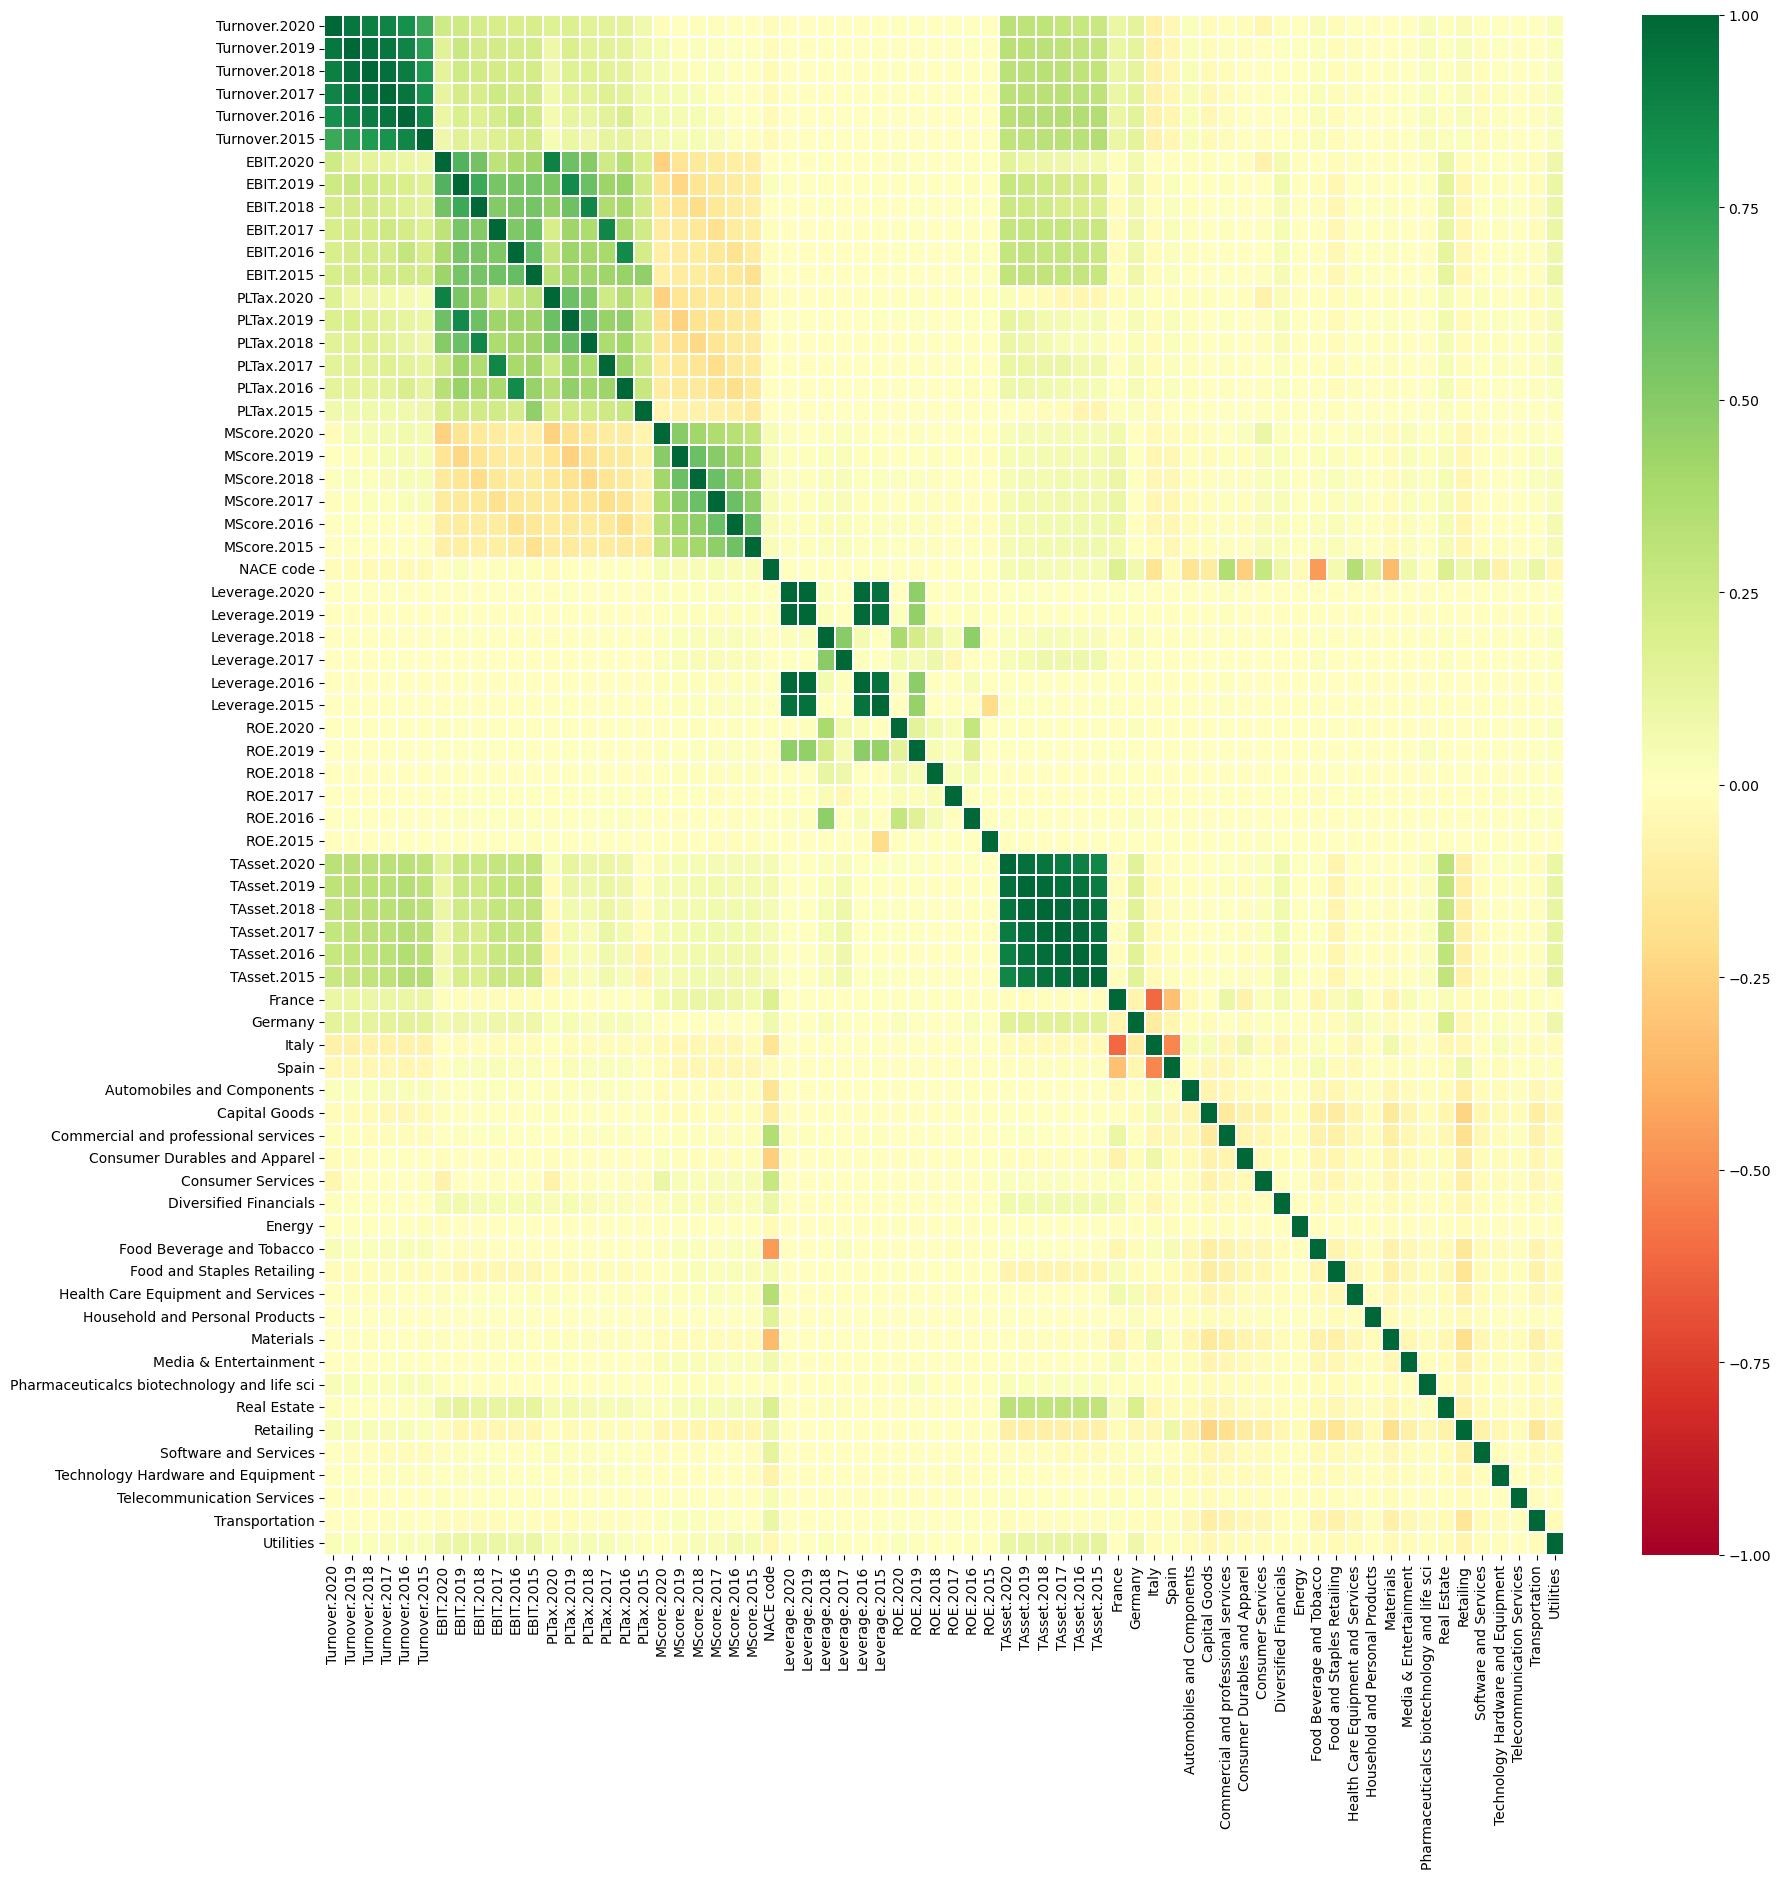

In [97]:
plt.figure(figsize=(20, 20))
sns.heatmap(new_df.iloc[:,1:].corr(), cmap='RdYlGn', linewidths = 0.1, vmin=-1);

In [13]:
new_df.to_csv('datasets/one-hot-credit-risk.csv', index=False)